<h1><center>Tennis Data Analysys</center></h1> 
<h2><center>Exploratory Data Analysis, Statistical Testing</center></h2>
<h3><center>Games Information</center></h3>

<center><img src="https://encrypted-tbn3.gstatic.com/images?q=tbn:ANd9GcSvzJyS8Ca3exh3feOv-0FNdOH9ois1V-DAZAAAc_Hic9_fkdSV" align="center"/></center>

# Table of Contents
* [1 Introduction ](#1)
* [2 Import Libraries](#2)
* [3 Read Csv Files & Cleaning Data](#3)
* [4 Number of Sets Played in Tennis Matches](#4)
* [5 Players information](#5)
  * [5.1 gender distribution](#5.1)
  * [5.2 plays distribution](#5.2)
  * [5.3 weight distribution](#5.3)
  * [5.4 height distribution](#5.4)
  * [5.5 current prize distribution](#5.5)
  * [5.6 total prize distribution](#5.6)
  * [5.7 count the number of players with each country](#5.7)
* [6 Statistics on Players Information](#6)
  * [6.1 Corrlation between players weight, height, rank and prize for men](#6.1)
  * [6.2 Corrlation between players weight, height, rank and prize for women](#6.2)
  * [6.3 Independent Samples t-test (Compare average height by gender)](#6.3)
  * [6.4 Independent Samples t-test (Compare average weight by gender)](#6.4)

<a id='1'></a>
# 1 Introduction

The objective of this project is to present an extensive analysis of the **Tennis matches Dataset**. The project is on several notbooks that every notbook will focus on diffrent subjects. This part we will analyze the the tennis games.

you can download data from this link:
<!DOCTYPE html>  
<html lang="en">  
<head>  
    <meta charset="UTF-8">  
    <meta name="viewport" content="width=device-width, initial-scale=1.0">  
    <title>Share Google Drive Link</title>  
    <script src="https://cdn.tailwindcss.com"></script>  
</head>  
<body class="flex items-center justify-center h-screen bg-gray-100">  
    <a href="https://drive.google.com/drive/folders/1Fy3j-VgZfSH6LtrTS7Be1jIKYLvoecIP?usp=drive_link" target="_blank" class="bg-blue-500 text-white font-bold py-2 px-4 rounded hover:bg-blue-700 transition">  
        View My Google Drive Folder  
    </a>  
</body>  
</html>

You can also : 
* Check the **GitHub Project Repository**


[![](https://img.shields.io/badge/Tennis%20Data%20Project-GitHub-100000?logo=github&logoColor=white)](https://github.com/HosseinFaghihi/tennis_project.git)

<a id='2'></a>
## 2 Import Libraries 

In [1]:
import os
import pandas as pd
from collections import defaultdict
import re
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter 
from scipy import stats 

<a id='3'></a>

## 3 Read Csv Files & Cleaning Data

In [2]:
# Define the directory and group names
base_folder = r"F:\daneshkar\my github\Tennis_project\tennis_data\csv_files"
group_names = [
    'home_team_score',
    'home_team',
    'away_team',
    'away_team_score',
    'event',
    'round',
    'season',
    'time',
    'tournament',
    'venue',
    'odds',
    'pbp',
    'statistics',
    'power',
    'votes'
]

# Initialize a dictionary to store the DataFrames
grouped_data_frames = {}

# Read each CSV file into a DataFrame and store it in the dictionary
for group_name in group_names:
    csv_file_path = os.path.join(base_folder, f'{group_name}.csv')
    if os.path.exists(csv_file_path):
        df = pd.read_csv(csv_file_path)
        grouped_data_frames[group_name] = df
        print(f'Successfully read {group_name}.csv')
    else:
        print(f'File {group_name}.csv not found')


Successfully read home_team_score.csv
Successfully read home_team.csv
Successfully read away_team.csv
Successfully read away_team_score.csv
Successfully read event.csv
Successfully read round.csv
Successfully read season.csv
Successfully read time.csv
Successfully read tournament.csv
Successfully read venue.csv
Successfully read odds.csv
Successfully read pbp.csv
Successfully read statistics.csv
Successfully read power.csv
Successfully read votes.csv


In [3]:
clean_away_team=grouped_data_frames['away_team'].drop_duplicates(subset=['match_id'], keep='last')
clean_away_team_score=grouped_data_frames['away_team_score'].drop_duplicates(subset=['match_id'], keep='last')
clean_event=grouped_data_frames['event'].drop_duplicates(subset=['match_id'], keep='last')
clean_home_team=grouped_data_frames['home_team'].drop_duplicates(subset=['match_id'], keep='last')
clean_home_team_score=grouped_data_frames['home_team_score'].drop_duplicates(subset=['match_id'], keep='last')
clean_odds=grouped_data_frames['odds'].drop_duplicates(subset=['choice_source_id','match_id'], keep='last')
clean_power=grouped_data_frames['power'].drop_duplicates(subset=['match_id','set_num','game_num','value','break_occurred'])
clean_pbp=grouped_data_frames['pbp'].drop_duplicates(subset=['match_id','set_id', 'game_id'])
clean_round=grouped_data_frames['round'].drop_duplicates(subset=['match_id','name'], keep='last')
clean_season=grouped_data_frames['season'].drop_duplicates(subset=['match_id'], keep='last')
clean_statistics=grouped_data_frames['statistics'].drop_duplicates(subset=['match_id','period','statistic_category_name','statistic_name'], keep='last')
clean_time=grouped_data_frames['time'].drop_duplicates(subset=['match_id'], keep='last')
clean_tournoment=grouped_data_frames['tournament'].drop_duplicates(subset=['match_id'], keep='last')
clean_venue=grouped_data_frames['venue'].drop_duplicates(subset=['match_id'], keep='last')
clean_votes=grouped_data_frames['votes'].drop_duplicates(subset=['match_id'], keep='last')

<a id='4'></a>

# 4 Number of Sets Played in Tennis Matches

             set_count
sets_number           
0                  311
1                   72
2                 6432
3                 2446
4                   36
5                   22


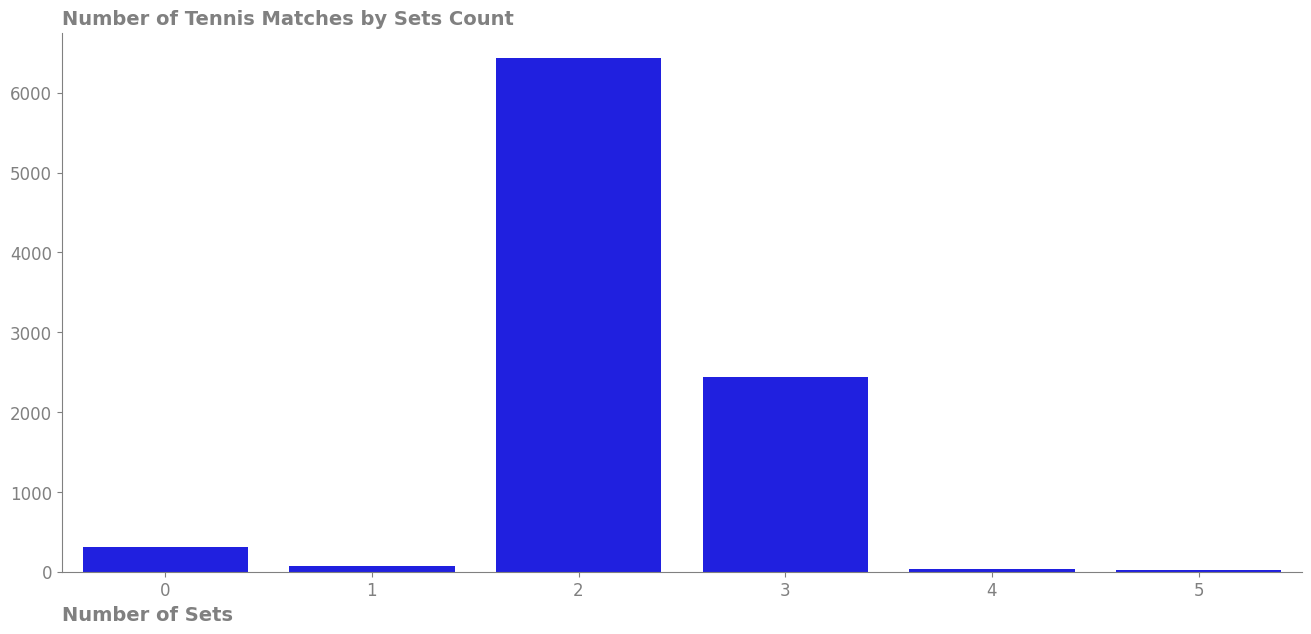

In [39]:
clean_home_team_score_set=clean_home_team_score

# Define the columns representing the periods
period_columns = ['period_1', 'period_2', 'period_3', 'period_4', 'period_5']

# Count non-null values across the specified columns for each row
clean_home_team_score_set.loc[:, 'sets_number'] = clean_home_team_score_set[period_columns].count(axis=1)


set_number = clean_home_team_score_set[['match_id','sets_number']].groupby(['sets_number']).count()
set_number['set_count'] = clean_home_team_score_set[['match_id','sets_number']].groupby(['sets_number']).count()

print(pd.DataFrame(set_number['set_count']))

# Plot  
fig, ax = plt.subplots(figsize=(16, 7))  

# set_number.plot(kind='bar', color='skyblue', ax=ax)  
sns.barplot(x=set_number['set_count'].index, y=set_number['set_count'], color='blue') 

# Customize the plot  
ax.spines[['right', 'top']].set_visible(False)  
ax.spines[['left', 'bottom']].set_color('gray')  

ax.set_xlabel('Number of Sets', loc='left', weight='bold', fontsize=14, color='gray')  
ax.set_ylabel('', loc='bottom', weight='bold', fontsize=14, color='gray')  
ax.set_title('Number of Tennis Matches by Sets Count', loc='left', weight='bold', fontsize=14, color='gray')  

ax.tick_params(axis='x', colors='gray', labelsize='large')  
ax.tick_params(axis='y', colors='gray', labelsize='large')  

plt.show()  


<a id='5'></a>

# 5 The Number of Surfaces Used in Tournaments

Ground Type Counts:
ground_type
Red clay             6862
Hardcourt outdoor    2296
Hardcourt indoor      114
Synthetic outdoor      47
Name: count, dtype: int64


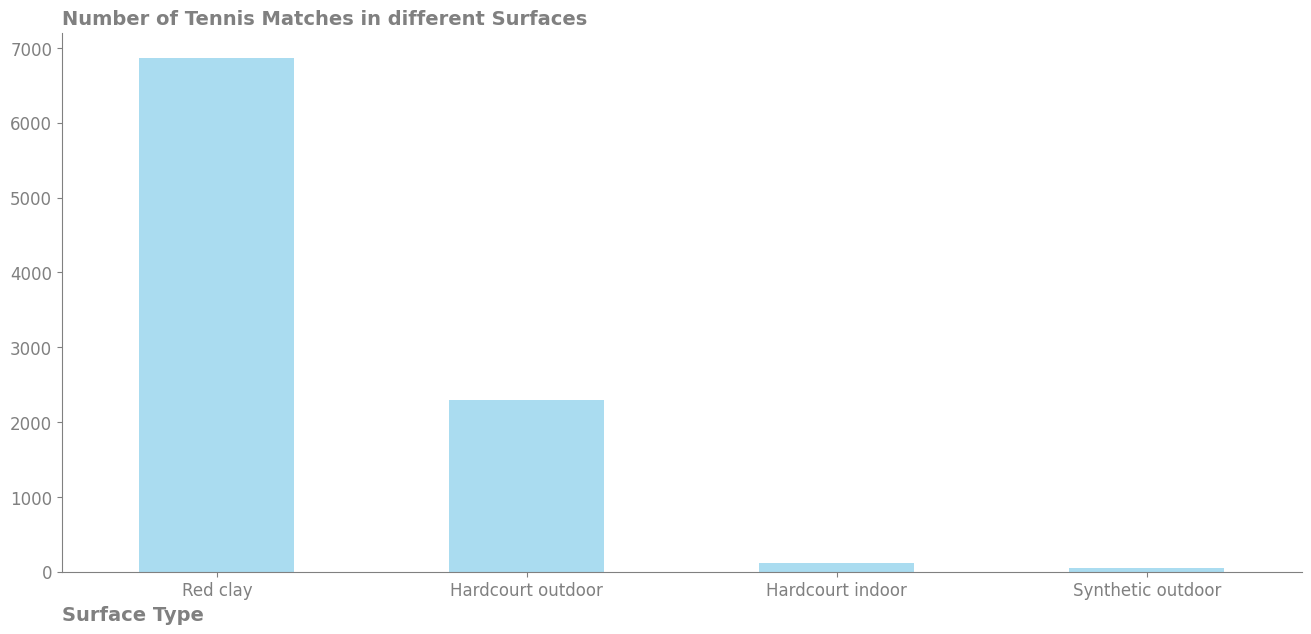

In [36]:
# Calculate the value counts of 'ground_type'
ground_type_counts = clean_tournoment['ground_type'].value_counts()

# Print the counts
print("Ground Type Counts:")
print(ground_type_counts)

# Plot  
fig, ax = plt.subplots(figsize=(16, 7))  

# set_number.plot(kind='bar', color='skyblue', ax=ax)  
ground_type_counts.plot(kind='bar', color='skyblue', alpha=0.7)

# Customize the plot  
ax.spines[['right', 'top']].set_visible(False)  
ax.spines[['left', 'bottom']].set_color('gray')  

ax.set_xlabel('Surface Type', loc='left', weight='bold', fontsize=14, color='gray')  
# ax.set_ylabel('Number of Matches', loc='bottom', weight='bold', fontsize=14, color='gray')  
ax.set_title('Number of Tennis Matches in different Surfaces ', loc='left', weight='bold', fontsize=14, color='gray')  

plt.xticks(rotation=0)

ax.tick_params(axis='x', colors='gray', labelsize='large')  
ax.tick_params(axis='y', colors='gray', labelsize='large')  

plt.show()  